<a href="https://colab.research.google.com/github/sabbaninikhitha/Breast_Cancer_detection-/blob/main/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')


In [ ]:
#count the number of empty values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#removing empty column
df=df.dropna(axis=1)

In [ ]:
df['diagnosis'].replace({'M': 1, 'B': 0}, inplace=True)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#counting of malognant and benign cells
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

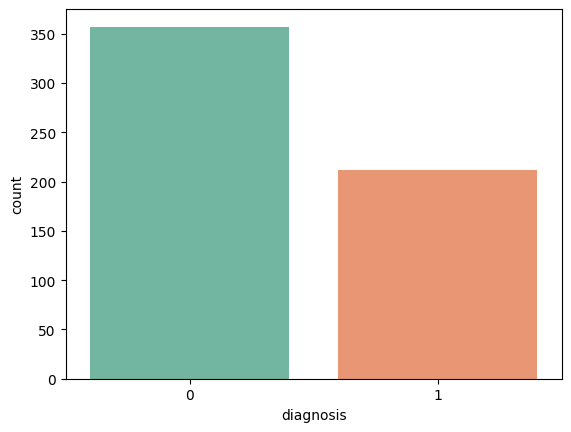

In [ ]:
#graph of M and B
sns.countplot(data=df,x='diagnosis',palette="Set2")

In [ ]:
# Feature extraction (mean and standard deviation)
X = df.iloc[:, 2:31].values
Y = df.iloc[:, 1].values
print(X.shape)
print(Y.shape)

(569, 29)
(569,)


In [ ]:
X=np.array(df.drop('diagnosis',axis=1))
Y=np.array(df.diagnosis)
scaler= StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
cancer_model = tf.keras.Sequential([
  layers.Dense(24,activation='relu'),
  layers.Dense(8,activation='relu'),
  layers.Dense(16,activation='relu'),
  layers.Dense(64,activation='relu'),
  layers.Dense(16,activation='relu'),
  layers.Dense(8,activation='relu'),
  layers.Dense(1,activation='sigmoid')
])

In [ ]:
cancer_model.compile(loss = 'binary_crossentropy',optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),metrics=['accuracy'])

In [ ]:


early=EarlyStopping(monitor='val_loss',mode='min',patience=20)



In [ ]:
cancer_model.fit(X_train, Y_train, epochs=100, validation_data=(X_test,Y_test),callbacks=[early])

Epoch 1/100
14/14 [==============================] - 2s 24ms/step - loss: 0.6905 - accuracy: 0.4765 - val_loss: 0.6565 - val_accuracy: 0.7133
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6365 - accuracy: 0.8192 - val_loss: 0.6034 - val_accuracy: 0.8951
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5800 - accuracy: 0.8803 - val_loss: 0.5323 - val_accuracy: 0.9231
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5030 - accuracy: 0.8991 - val_loss: 0.4382 - val_accuracy: 0.9231
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4035 - accuracy: 0.9131 - val_loss: 0.3281 - val_accuracy: 0.9371
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.2988 - accuracy: 0.9319 - val_loss: 0.2333 - val_accuracy: 0.9510
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.2177 - accuracy: 0.9319 - val_loss: 0.1675 - val_accuracy: 0.9510
Epoch 8/100


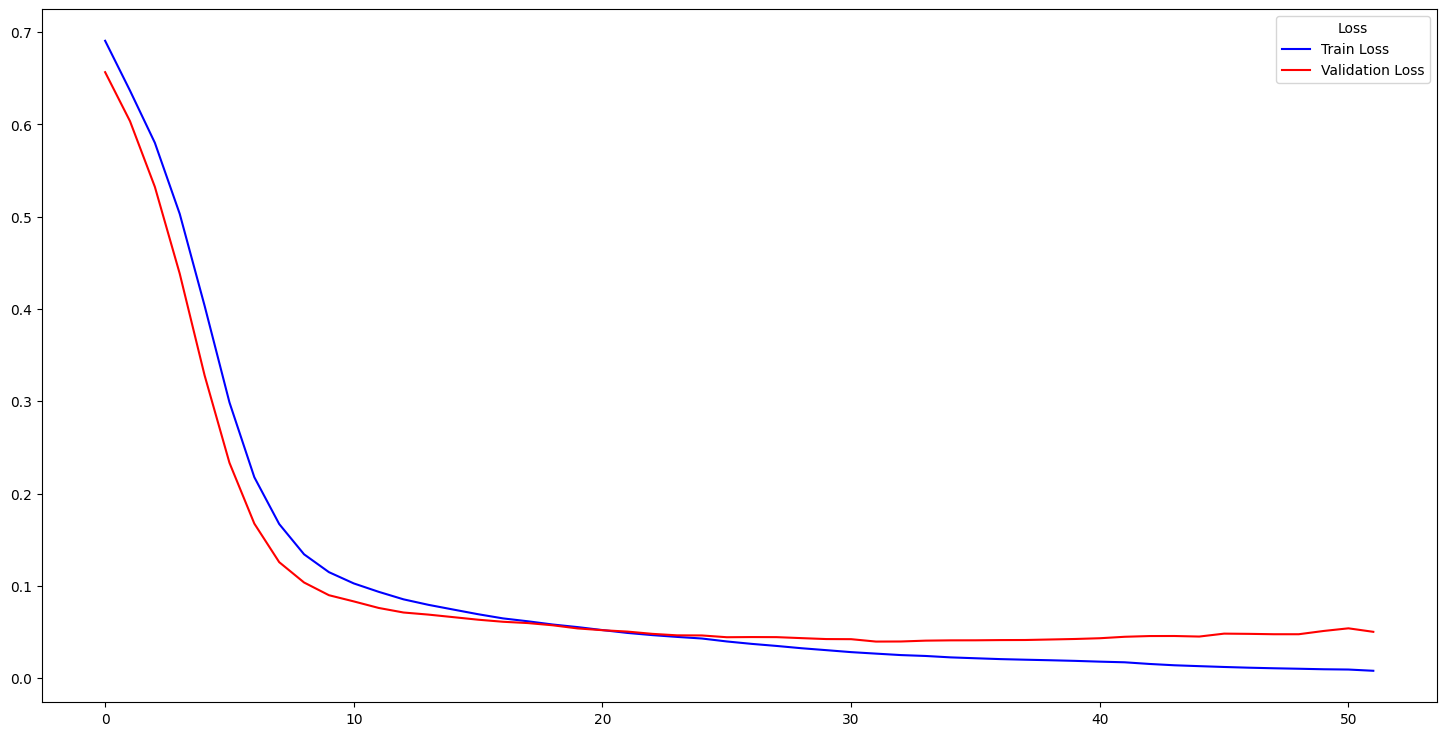

In [ ]:
fig= plt.subplots(1, 1, figsize=(18, 9))
plt.plot(list(cancer_model.history.history['loss']),color='blue', label='Train Loss')
plt.plot(list(cancer_model.history.history['val_loss']),color='red', label='Validation Loss')
plt.legend(title='Loss')
plt.show()

In [ ]:
predict=cancer_model.predict(X_test)
predict = np.array([ 1 if pred >=0.5 else 0 for pred in predict])
print(' pred ', predict)
print('--------------')
print('actual', Y_test)
print('--------------')
print('accuracy', accuracy_score(Y_test,predict))
print('--------------')
print(confusion_matrix(Y_test,predict))

5/5 [==============================] - 0s 3ms/step
 pred  [0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0]
--------------
actual [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0]
--------------
accuracy 0.9790209790209791
--------------
[[87  2]
 [ 1 53]]
